In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import time
import math
import experiments.toy_regression as exp

C:\Users\flose\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cpu")

In [3]:
batch_size = 20
noise = torch.tensor(0.02).to(device) # 3, 0.02
layers = [
    (1, 32),
    (32, 32),
    (32, 32),
    (32, 1)
]
learn_var = False

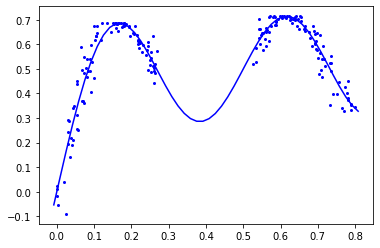

In [5]:
from training import toy

torch.manual_seed(42)

trainset = toy.TrigonometricToyDataset(sample_count=200, noise=0.02, normalize=False, max=0.8, skip=0.25)
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)

trainset.plot_dataset()

In [6]:
torch.manual_seed(42)
gp = exp.gaussian_process(100, trainset.normalized_xs, trainset.normalized_ys)

C:\Users\flose\anaconda3\envs\ml\lib\site-packages\gpytorch\lazy\triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


Epoch 0: loss 0.7717236280441284
Epoch 20: loss -0.03826026991009712
Epoch 40: loss -0.9466962218284607
Epoch 60: loss -1.463814377784729
Epoch 80: loss -1.4640405178070068


In [5]:
torch.manual_seed(42)
pp = exp.point_estimator(layers, noise, learn_var, 900, trainloader, batch_size, device)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Epoch 0: loss -0.019352033734321594
Epoch 100: loss -0.06830703467130661
Epoch 200: loss -0.08435720205307007
Epoch 300: loss -0.08422008156776428
Epoch 400: loss -0.08660232275724411
Epoch 500: loss -0.08755896240472794
Epoch 600: loss -0.08787510544061661
Epoch 700: loss -0.08955562859773636
Epoch 800: loss -0.09185030311346054
Final loss -0.09329470992088318


In [63]:
torch.manual_seed(42)
swag = exp.swag(layers, noise, learn_var, 900, 5, 20, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Epoch 0: loss -0.019352033734321594
Epoch 100: loss -0.06830703467130661
Epoch 200: loss -0.08435720205307007
Epoch 300: loss -0.08422008156776428
Epoch 400: loss -0.08660232275724411
Epoch 500: loss -0.08755896240472794
Epoch 600: loss -0.08787510544061661
Epoch 700: loss -0.08955562859773636
Epoch 800: loss -0.09185030311346054
Final loss -0.09329470992088318


In [9]:
torch.manual_seed(42)
ensemble = exp.ensemble(5, layers, noise, learn_var, 900, trainloader, batch_size, parallel=False)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1)

In [197]:
torch.manual_seed(42)
mc_dropout = exp.mc_dropout(0.1, layers, noise, learn_var, 900, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=35, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=35, out_features=35, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=35, out_features=35, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.1, inplace=False)
  (9): Linear(in_features=35, out_features=1, bias=True)
)
Epoch 0: loss -0.04623353108763695
Epoch 100: loss -0.08249913901090622
Epoch 200: loss -0.08788342773914337
Epoch 300: loss -0.08822451531887054
Epoch 400: loss -0.09039641171693802
Epoch 500: loss -0.08920774608850479
Epoch 600: loss -0.08926518261432648
Epoch 700: loss -0.09027083218097687
Epoch 800: loss -0.0911581963300705
Final loss -0.09162870049476624


In [24]:
torch.manual_seed(42)
intel_bbb = exp.intel_bbb(layers, noise, learn_var, 1000, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Epoch 0: loss 0.06866756826639175
Epoch 100: loss -0.04875808581709862
Epoch 200: loss -0.0575006902217865
Epoch 300: loss -0.06337267905473709
Epoch 400: loss -0.04353934898972511
Epoch 500: loss -0.045814815908670425
Epoch 600: loss -0.044774290174245834
Epoch 700: loss -0.047862738370895386
Epoch 800: loss 56.01365280151367
Epoch 900: loss -0.04581841826438904
Final loss -0.04311175271868706


In [21]:
torch.manual_seed(42)
bbb = exp.bbb(layers, noise, learn_var, 1000, trainloader, batch_size, device)

Generated model: Sequential(
  (0): BBBLinear()
  (1): ReLU()
  (2): BBBLinear()
  (3): ReLU()
  (4): BBBLinear()
  (5): ReLU()
  (6): BBBLinear()
)
Epoch 0: loss 28.07708168029785
Epoch 10: loss 26.093652725219727
Epoch 20: loss 24.019289016723633
Epoch 30: loss 21.9820499420166
Epoch 40: loss 19.988693237304688
Epoch 50: loss 18.046405792236328
Epoch 60: loss 16.164592742919922
Epoch 70: loss 14.358098030090332
Epoch 80: loss 12.632728576660156
Epoch 90: loss 11.011222839355469
Epoch 100: loss 9.495136260986328
Epoch 110: loss 8.12125015258789
Epoch 120: loss 6.866820812225342
Epoch 130: loss 5.7668375968933105
Epoch 140: loss 4.808370590209961
Epoch 150: loss 3.979651689529419
Epoch 160: loss 3.287109613418579
Epoch 170: loss 2.6930179595947266
Epoch 180: loss 2.2330901622772217
Epoch 190: loss 1.8295867443084717
Epoch 200: loss 1.522729516029358
Epoch 210: loss 1.2875251770019531
Epoch 220: loss 1.1315793991088867
Epoch 230: loss 0.9825700521469116
Epoch 240: loss 0.859049975872039

C:\Users\flose\anaconda3\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
C:\Users\flose\anaconda3\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


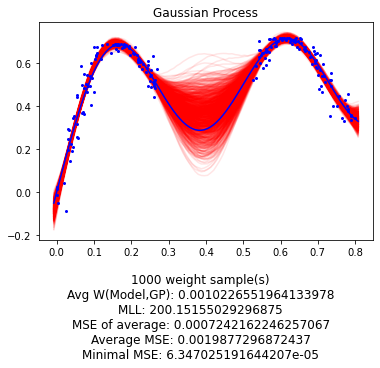

In [7]:
trainset.plot("Gaussian Process", gp, gp, alpha=0.1, samples=1000)

C:\Users\flose\anaconda3\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


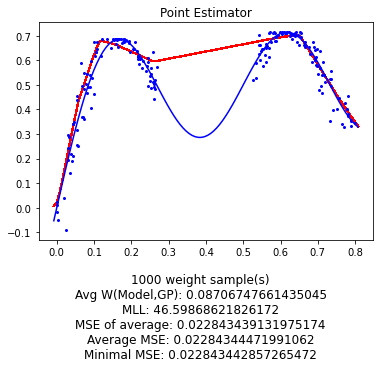

In [8]:
trainset.plot("Point Estimator", pp, gp, alpha=0.1, samples=1000)

C:\Users\flose\anaconda3\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


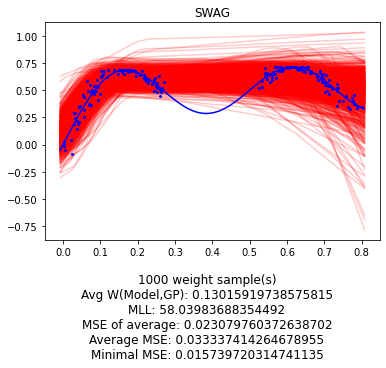

In [64]:
trainset.plot("SWAG", swag, gp, alpha=0.2, samples=1000)

C:\Users\flose\anaconda3\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


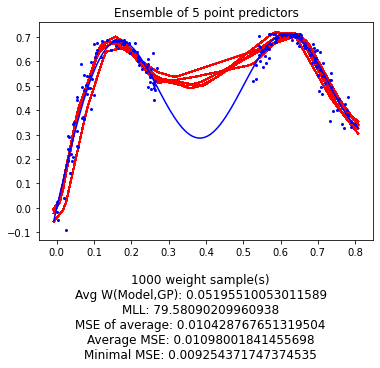

In [10]:
trainset.plot("Ensemble of 5 point predictors", ensemble, gp, alpha=0.1, samples=1000)

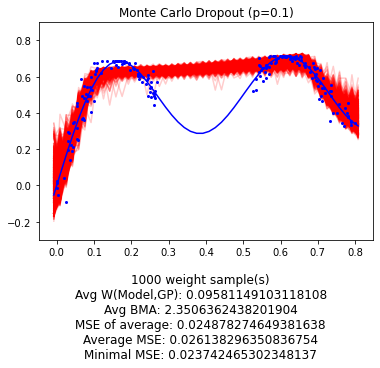

In [218]:
trainset.plot("Monte Carlo Dropout (p=0.1)", mc_dropout, gp, alpha=0.2, samples=1000)

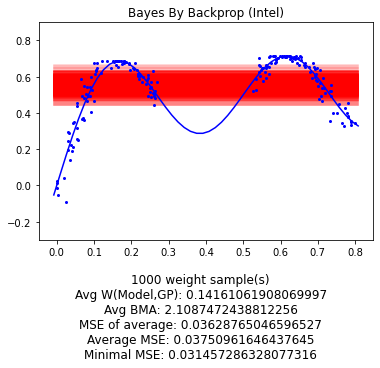

In [219]:
trainset.plot("Bayes By Backprop (Intel)", intel_bbb, gp, alpha=0.2, samples=1000)

C:\Users\flose\anaconda3\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


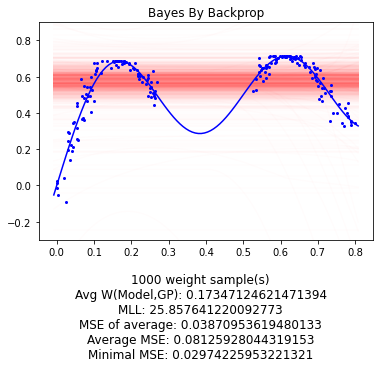

In [23]:
trainset.plot("Bayes By Backprop", bbb, gp, alpha=0.01, samples=1000)